(221,)


C:\Users\SAGOYAL\AppData\Local\Temp\ipykernel_13744\1613322294.py:19: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  newImg = newImg.transpose(method = Image.FLIP_TOP_BOTTOM)


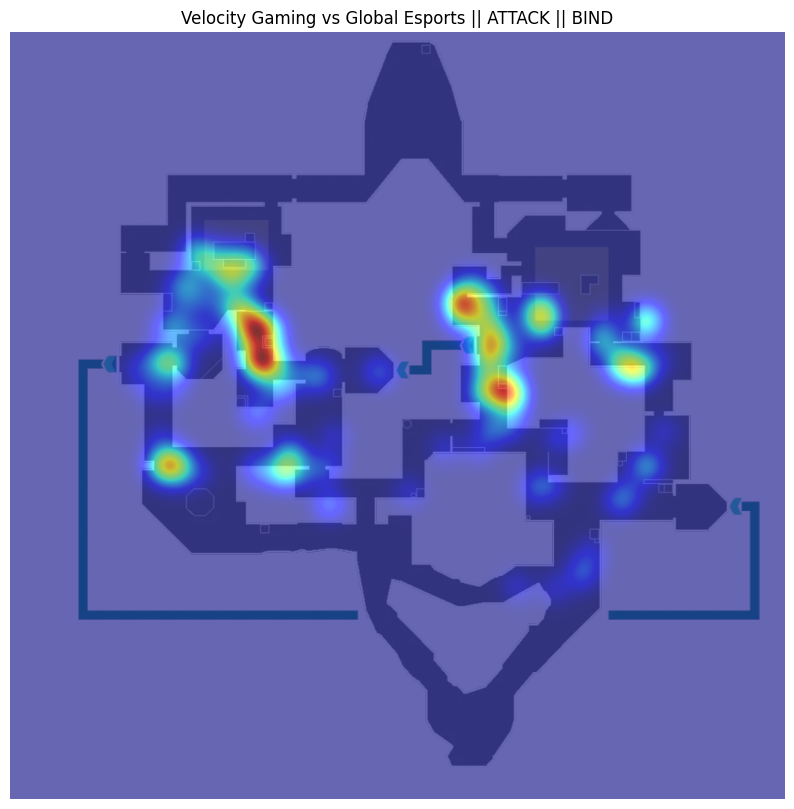

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from PIL import Image
from scipy.ndimage import gaussian_filter

img = Image.open('bind.webp')
df = pd.read_csv('VLTvsGE-Bind-Attack.csv')
#print(df.to_string())
#data = df[['locX','locY']]
xloc = np.array(df[['locX']]).reshape(-1,)
yloc = np.array(df[['locY']]).reshape(-1,)

print(xloc.shape)

newImg = img.resize((1010,1000))
newImg = newImg.transpose(method = Image.FLIP_TOP_BOTTOM)
plt_1 = plt.figure(figsize= (10,10))
plt.imshow(newImg)

#plt.scatter(xloc,yloc,c = 'r')


heatmap,xedges, yedges = np.histogram2d(xloc,yloc,range = [[0,1010],[0,1000]] ,bins = 1000)
heatmap = gaussian_filter(heatmap,16)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
extent = [0,1010,0,1000]

plt.imshow(heatmap.T,alpha = 0.6, cmap = cm.jet, extent = extent)
#plt.imshow(img)
plt.axis('off')
plt.title('Velocity Gaming vs Global Esports || ATTACK || BIND')
plt.draw()
plt.savefig('VLTvsGE_Atk_Bind',dpi = 300, bbox_inches = 'tight')
plt.show()